Name : Ritabrato Pani
Roll no : 22053095

Original x data: [ 9.1  8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2]
Original y data: [0.99523 0.99007 0.99769 0.99386 0.99508 0.9963  1.0032  0.99768 0.99584
 0.99609]
Normalized x data: [0.3627451  0.25490196 0.3627451  0.29411765 0.14705882 0.2254902
 1.         0.18627451 0.15686275 0.17647059]
Final theta values: [0.96147328 0.13129186]


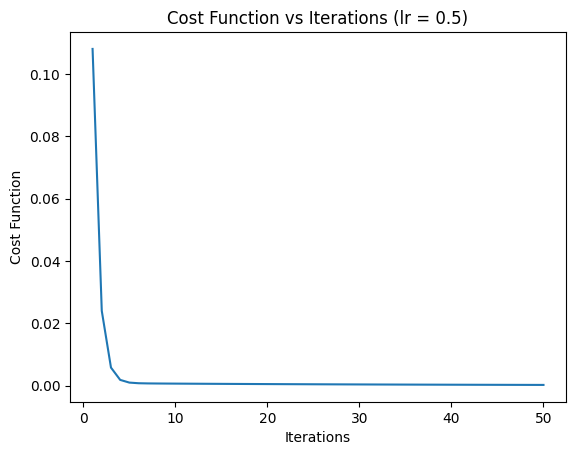

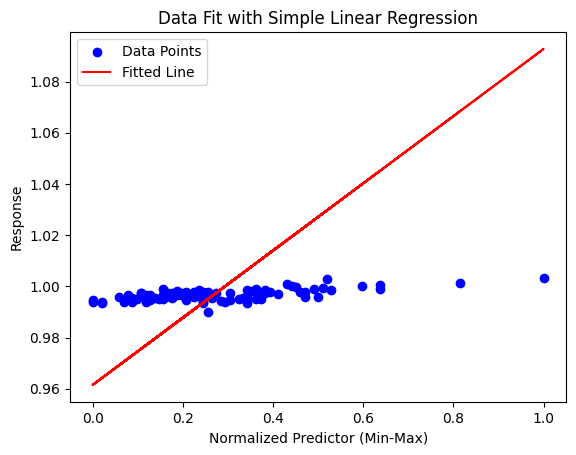

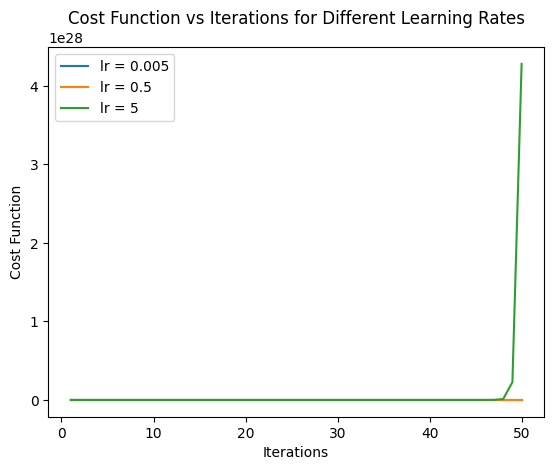

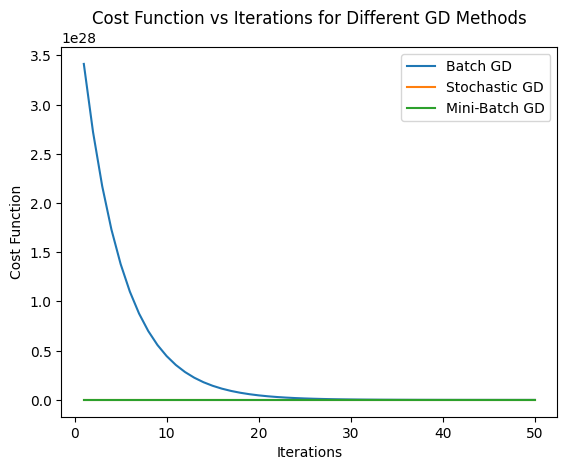

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
x = np.loadtxt('linearX.csv')
y = np.loadtxt('linearY.csv')

# Check original data
print("Original x data:", x[:10])  # Display first 10 values of x
print("Original y data:", y[:10])  # Display first 10 values of y

# Min-Max normalization of x
x_min = np.min(x)
x_max = np.max(x)
x = (x - x_min) / (x_max - x_min)

# Check normalized data
print("Normalized x data:", x[:10])  # Display first 10 values of normalized x

# Prepare data for gradient descent
X = np.c_[np.ones(x.shape[0]), x]  # Add bias term (column of ones)
theta = np.zeros(2)  # Initialize theta to zero

# Compute cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= lr * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Training parameters
lr = 0.5  # Learning rate
iterations = 50  # Number of iterations for gradient descent

# Run gradient descent
theta_final, cost_history = gradient_descent(X, y, theta, lr, iterations)

# Check the final parameters
print("Final theta values:", theta_final)

# Plot the cost history
plt.plot(range(1, len(cost_history) + 1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title(f'Cost Function vs Iterations (lr = {lr})')
plt.show()

# Plot the data points and the fitted line
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, X.dot(theta_final), color='red', label='Fitted Line')
plt.xlabel('Normalized Predictor (Min-Max)')
plt.ylabel('Response')
plt.title('Data Fit with Simple Linear Regression')
plt.legend()
plt.show()

# Experiment with different learning rates
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    _, cost_history = gradient_descent(X, y, theta, lr, iterations)
    plt.plot(range(1, len(cost_history) + 1), cost_history, label=f'lr = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.legend()
plt.show()

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        for j in range(m):
            rand_idx = np.random.randint(0, m)
            X_j = X[rand_idx, :].reshape(1, -1)
            y_j = y[rand_idx]
            predictions = X_j.dot(theta)
            errors = predictions - y_j
            gradients = X_j.T.dot(errors)
            theta -= lr * gradients.flatten()
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Mini-batch Gradient Descent (MBGD)
def mini_batch_gradient_descent(X, y, theta, lr, iterations, batch_size):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            gradients = (1 / len(y_batch)) * X_batch.T.dot(errors)
            theta -= lr * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

theta_bgd, cost_bgd = gradient_descent(X, y, theta, lr=0.1, iterations=50)
theta_sgd, cost_sgd = stochastic_gradient_descent(X, y, theta, lr=0.1, iterations=50)
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X, y, theta, lr=0.1, iterations=50, batch_size=10)

plt.plot(range(1, len(cost_bgd) + 1), cost_bgd, label='Batch GD')
plt.plot(range(1, len(cost_sgd) + 1), cost_sgd, label='Stochastic GD')
plt.plot(range(1, len(cost_mbgd) + 1), cost_mbgd, label='Mini-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations for Different GD Methods')
plt.legend()
plt.show()
